# Phase 1 - Week 2 - Day 3 PM - Algorithm Chains & Pipelines

# A. Data Loading & Preprocessing

In this tutorial, we will use the breast cancer dataset to predict whether someone will get breast cancer or not. For more info, you can visit this [link](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

Breast cancer is one of the leading causes of death worldwide. Due to its deadly nature, it is crucial that someone with breast cancer is not predicted by the model as not having breast cancer. Therefore, in this particular problem, **minimizing False Negatives will be emphasized**, or in other words, we will **use recall metrics** as a reference for model performance.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

In [2]:
# Data loading

cancer_df = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
cancer_df['target'] = load_breast_cancer().target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Check dataset

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
# Split between `X` and `y`

X = cancer_df.drop('target', axis=1)
y = cancer_df['target']
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# Split dataset into train-Set and test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (426, 30)
Test size  :  (143, 30)


In [6]:
# Feature scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# B. Model Training without Pipeline

Next, we will train the model using Logistic Regression.

In [7]:
# Model training
%%time

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

CPU times: user 9.91 ms, sys: 2.56 ms, total: 12.5 ms
Wall time: 8.16 ms


LogisticRegression(random_state=42)

In [8]:
# Create a function to check the performance

def performance_check(clf, X, y):
  y_pred = clf.predict(X)

  return recall_score(y, y_pred)

In [9]:
# Check model performance

print('Recall - Train : ', performance_check(logreg, X_train_scaled, y_train))
print('Recall - Test  : ', performance_check(logreg, X_test_scaled, y_test))

Recall - Train :  0.9962546816479401
Recall - Test  :  1.0


Wow. Our model is superb for predicting breast cancer patient.

# C. Model Training using Pipeline

Let's build the same model but with pipeline. Pipeline can make our code become less. There 2 ways to make pipeline in Scikit-Learn :

1. Using `pipeline`
   * Pipeline requires you to explicitly specify custom names for each step in the form of a list of tuples containing the step name and the associated estimator/transformer.
   * This allows you to have more control over the names of the steps and potentially make the code more readable, especially when you have complex pipelines with multiple steps of the same type.
   You can assign meaningful names to each step, which can be useful for debugging and analysis.

2. Using `make_pipeline`
   * `make_pipeline` is a shorthand function that automatically generates step names based on the names of the estimators or transformers provided.
   * It uses the lowercase names of the classes as the step names, which can make the code more concise and can be convenient for quick prototyping or simple pipelines.
   * However, it might be less descriptive when dealing with more complex pipelines or multiple steps of the same type.

In [10]:
# Method 1 : Model training using `Pipeline`

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logreg', LogisticRegression(random_state=42))])
pipe.fit(X_train, y_train)

# Check model performance
print('Recall - Train : ', performance_check(pipe, X_train, y_train))
print('Recall - Test  : ', performance_check(pipe, X_test, y_test))

Recall - Train :  0.9962546816479401
Recall - Test  :  1.0


In [11]:
# Method 2 : Model training using `make_pipeline`

from sklearn.pipeline import make_pipeline

pipe_short = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=42))
pipe_short.fit(X_train, y_train)

print('Pipeline steps : ', pipe_short.steps)

Pipeline steps :  [('minmaxscaler', MinMaxScaler()), ('logisticregression', LogisticRegression(random_state=42))]


In [12]:
# Check the Performance

print('Recall - Train : ', performance_check(pipe_short, X_train, y_train))
print('Recall - Test  : ', performance_check(pipe_short, X_test, y_test))

Recall - Train :  0.9962546816479401
Recall - Test  :  1.0


In [13]:
# Example if multiple steps have the same class

pipe_short2 = make_pipeline(MinMaxScaler(), MinMaxScaler(), LogisticRegression(random_state=42))

print('Pipeline steps : ', pipe_short2.steps)

Pipeline steps :  [('minmaxscaler-1', MinMaxScaler()), ('minmaxscaler-2', MinMaxScaler()), ('logisticregression', LogisticRegression(random_state=42))]


# D. Combining Pipeline with Hyperparameter Tuning

Let's combine Pipeline with Hyperparameter TUning (Grid Search)

In [14]:
# Define the Pipeline

pipe = Pipeline([('scaler', MinMaxScaler()), ('logreg', LogisticRegression(random_state=42))])

In [15]:
# Define Hyperparameters for GridSearchCV

from sklearn.model_selection import GridSearchCV

grid_search_params = {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]}

clf_grid = GridSearchCV(pipe, param_grid=grid_search_params, cv=5)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('logreg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [16]:
# Get Best Hyperparameters

best_params = clf_grid.best_params_
best_params

{'logreg__C': 100}

In [17]:
# Get Best Estimator

best_estimator = clf_grid.best_estimator_
best_estimator

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logreg', LogisticRegression(C=100, random_state=42))])

In case you need further analysis from each step, you can also get particular step from pipeline after training.

In [18]:
# Get Particular Steps

best_estimator.named_steps['logreg']

LogisticRegression(C=100, random_state=42)

In [19]:
# Get result from a particular step such as coefficients and intercept from Logistic Regression

print('Coefficient : ', best_estimator.named_steps['logreg'].coef_)
print('Intercept   : ', best_estimator.named_steps['logreg'].intercept_)

Coefficient :  [[  0.07860322  -4.44154479  -0.28465659  -1.51449435  -0.70926092
    6.02717748  -5.29796596  -6.74930906  -4.53593959  -0.51032221
  -14.51693134   0.31780211  -9.92031333  -8.07153708   1.34864098
    9.32827948   1.47869978  -2.77703331   1.11309918   6.48801012
   -9.35676268  -5.64914439  -7.82809828  -7.81723627  -2.54779841
    1.42778416  -6.22944044  -6.69724272  -4.50492766  -5.22233248]]
Intercept   :  [20.70909136]


In [20]:
# Check the Performance

print('Recall - Train : ', performance_check(best_estimator, X_train, y_train))
print('Recall - Test  : ', performance_check(best_estimator, X_test, y_test))

Recall - Train :  1.0
Recall - Test  :  0.9666666666666667


# E. Pipeline with Mixed Variables

To demonstrate a pipeline with numeric and categorical data types, we will use a dataset to predict survivors from the Titanic.

In [21]:
# Data loading

titanic_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D3AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
# Check the dataset

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As you can see there are missing values in columns `Age`, `Cabin`, and `Embarked`.

In [23]:
# Splitting between `X` and `y`

X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [24]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (668, 11)
Test Size :  (223, 11)


Let's say after Feature Selection, you decide to drop column `PassengerId`

In [25]:
# Drop column `PassengerId`

X_train.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
30,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,27.7208,NaN,C
261,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,31.3875,NaN,S
875,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,7.2250,NaN,C
874,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,24.0000,NaN,C
187,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,26.5500,NaN,S
...,...,...,...,...,...,...,...,...,...
218,1,"Bazzani, Miss. Albina",female,32.0,0,0,76.2917,D15,C
223,3,"Nenkoff, Mr. Christo",male,NaN,0,0,7.8958,NaN,S
271,3,"Tornquist, Mr. William Henry",male,25.0,0,0,0.0000,NaN,S
474,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,9.8375,NaN,S


In [26]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns :  ['Name', 'Sex', 'Cabin', 'Embarked']


In [27]:
# Create A Pipeline

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             MinMaxScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

clf = make_pipeline(preprocessing_pipeline, LogisticRegression())
clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name', 'Sex', 'Cabin',
                                                   'Embarked'])])),
                ('logisticregression', LogisticRegression())])

**IMPORTANT NOTES**

We know there are several columns that contain missing values such as `Age`, `Cabin`, and `Embarked`.

Even if you use a pipeline with `SimpleImputer` to perform imputation, **you must first check the type of missing values and state clearly what technique will be used.**

In other words, exploration must be carried out regarding the missing values, although later this will be resolved with a Pipeline.

Likewise with Outliers. **You should look for the type of distribution and state clearly what technique you use to deal with outliers.**

In [28]:
# Check performance model

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       407
           1       0.90      0.80      0.85       261

    accuracy                           0.89       668
   macro avg       0.89      0.87      0.88       668
weighted avg       0.89      0.89      0.89       668


Test
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       142
           1       0.74      0.73      0.73        81

    accuracy                           0.81       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



# F. Another Advantages of Pipeline - Prevent Data Leakage during Cross Validation

## F.1 - Usecase 1 : Breast Cancer Dataset

In [29]:
# Install library mglearn

!pip install mglearn

In [30]:
# Data loading

cancer_df = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
cancer_df['target'] = load_breast_cancer().target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [31]:
# Split between `X` and `y`

X = cancer_df.drop('target', axis=1)
y = cancer_df['target']
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
# Split dataset into train-Set and test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (426, 30)
Test size  :  (143, 30)


### Without using Pipeline

In [33]:
# Feature scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Hyperparameter Tuning with Grid Search

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(SVC(random_state=42), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print('Best cross-validation accuracy : {:.2f}'.format(grid.best_score_))
print('Best parameters : ', grid.best_params_)
print('Test set accuracy : {:.2f}'.format(grid.score(X_test_scaled, y_test)))

Best cross-validation accuracy : 0.98
Best parameters :  {'C': 1, 'gamma': 1}
Test set accuracy : 0.97


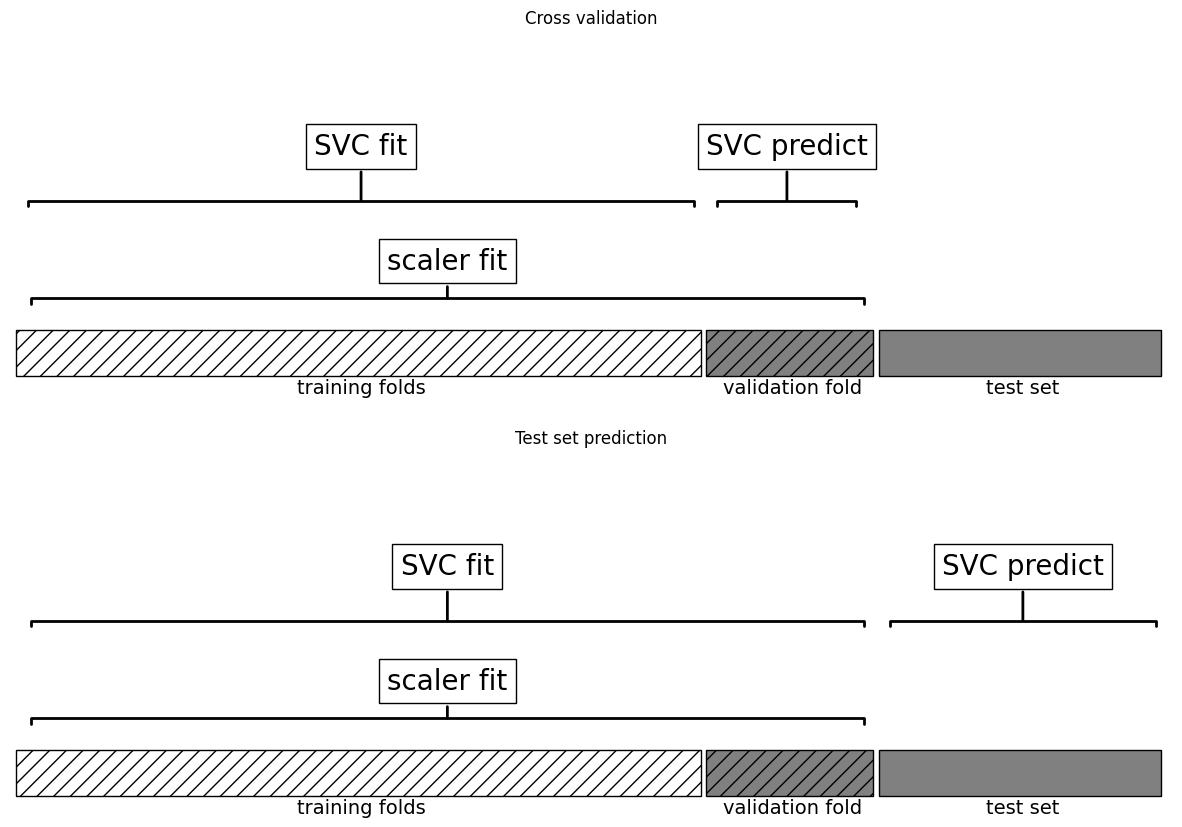

In [35]:
# Plot training schema using GridSearcCV

import mglearn
mglearn.plots.plot_improper_processing()

**IMPORTANT NOTES**

As you can see, the plot above will illustrate the process during Cross Validation and also when making predictions on unseen data.

During Cross Validation, it's evident that Feature Scaling is applied with `.fit()` to both the train-set and validation-set. This could cause data leakage.

Any fitting process, whether it's Feature Scaling, Feature Encoding, handling missing values, or handling outliers, must only come from the train set. Meanwhile, the validation-set and test-set should can only perform `.transform()`.

### With Pipeline

In [36]:
# Create a pipeline and combine it with GridSearchCV

pipe = Pipeline([("scaler", MinMaxScaler()), ("clf", SVC())])

param_grid = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print('Best cross-validation accuracy : {:.2f}'.format(grid.best_score_))
print('Best parameters : ', grid.best_params_)
print('Test set accuracy : {:.2f}'.format(grid.score(X_test, y_test)))

Best cross-validation accuracy : 0.98
Best parameters :  {'clf__C': 1, 'clf__gamma': 1}
Test set accuracy : 0.97


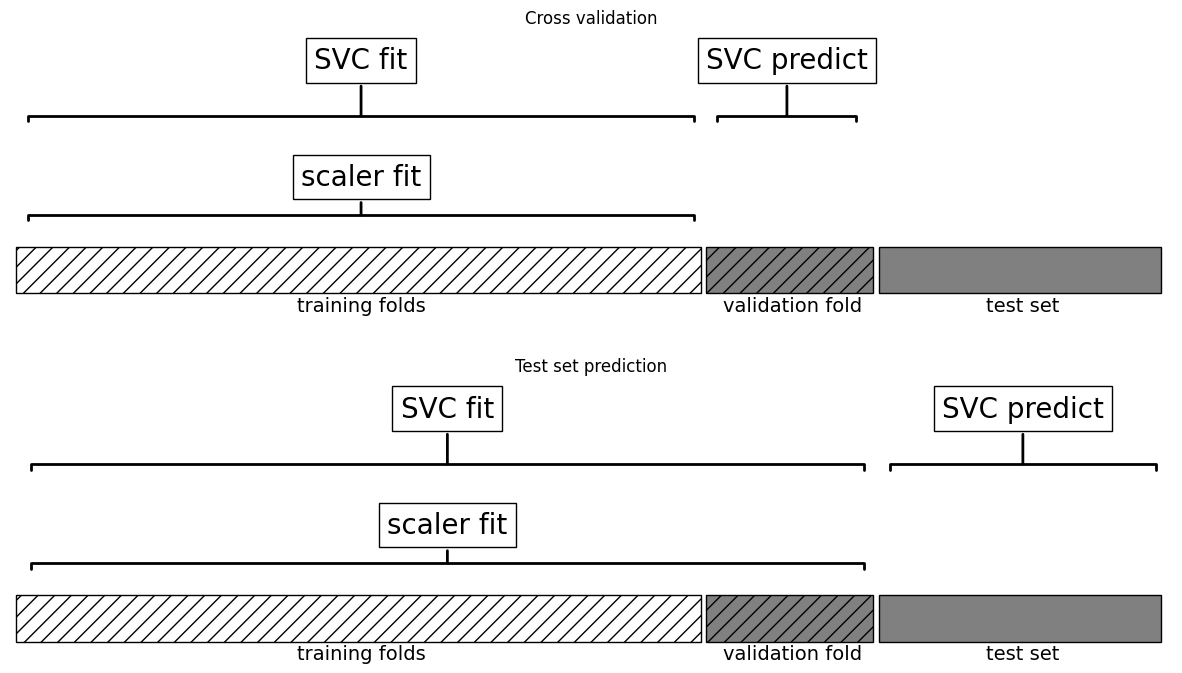

In [37]:
# Plot training schema using GridSearcCV

mglearn.plots.plot_proper_processing()

## F.2 - Usecase 2 : Random Dataset

To demonstrate the usefulness of Pipeline in Cross Validation, this time we will create a dataset where the features and targets have no correlation whatsoever and the model should experience low performance because it is difficult to determine the right decision boundary.

In [38]:
# Create Dataset

rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

print('Size - X : ', X.shape)
print('Size - y : ', y.shape)

Size - X :  (100, 10000)
Size - y :  (100,)


We created dataset that contains of 10,000 features.

In [39]:
# Feature Selection
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)

print('X_selected.shape : ', X_selected.shape)

X_selected.shape :  (100, 500)


## Without using Pipeline

In [40]:
# Create a model using Ridge Regression algorithm and check the performance

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

print('Cross Validation Accuracy : ', np.mean(cross_val_score(Ridge(), X_selected, y, cv=5)))

Cross Validation Accuracy :  0.9057953065239822


Amazing!. A truly random data can be predicted with high performance through the Ridge Regression model. This is impossible !

## With Pipeline

In [41]:
# Create the same model but with pipeline

pipe = Pipeline([("select", SelectPercentile(score_func=f_regression,
                                             percentile=5)),
                 ("ridge", Ridge())])

print('Cross Validation Accuracy : ', np.mean(cross_val_score(pipe, X, y, cv=5)))

Cross Validation Accuracy :  -0.2465542238495281


As you can see, the value is negative. This is exactly what we are hoping for. It means the model can't find the right decision boundary.